In [1]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np

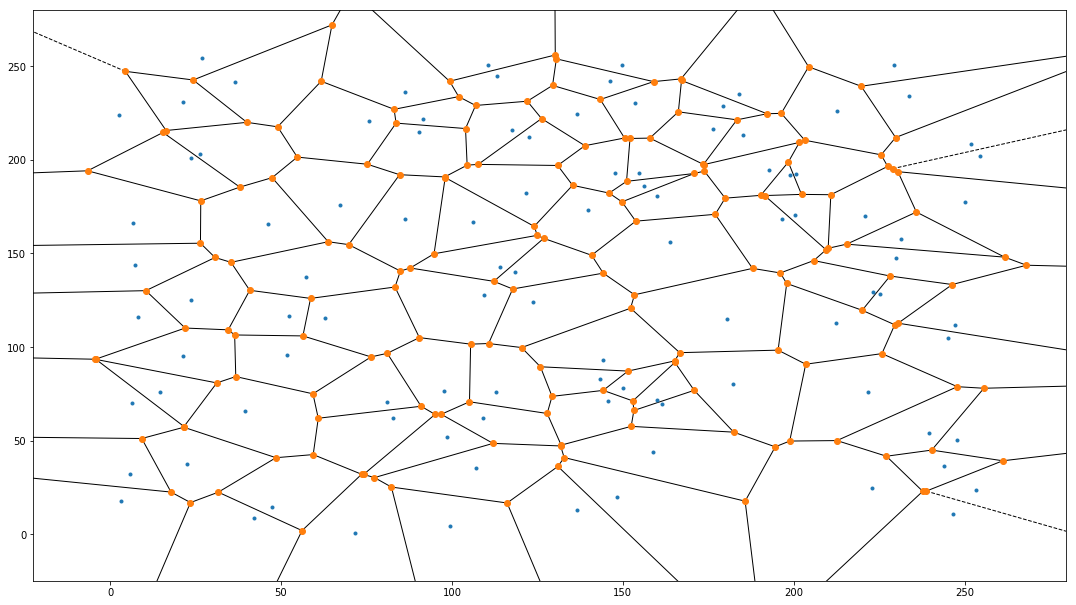

In [9]:
points = 256*np.random.random((100,2))

vor = Voronoi(points)

fig = voronoi_plot_2d(vor)
fig.set_size_inches(18.5, 10.5)
plt.show()

In [115]:
def checkVertices(vertices):
    for couple in vertices:
        if (any(x < 0 or x > 256 for x in couple)):
            return False
    return True

def relax_points(self, times):
        """
        Relaxes the points after an initial Voronoi is created to refine the graph.
        See: https://stackoverflow.com/questions/17637244/voronoi-and-lloyd-relaxation-using-python-scipy

        :param times: Number of times to relax
        :type times: int

        :return: the final voronoi diagrama
        :rtype: scipy.spatial.Voronoi
        """
        for i in range(times):
            centroids = []
            for region in self.regions:
                if (region != []):
                    vertices = self.vertices[region]
                    if (checkVertices(vertices)):
                        centroid_x = np.sum(vertices[:, 0])/vertices.shape[0]
                        centroid_y = np.sum(vertices[:, 1])/vertices.shape[0]
                        centroid = [centroid_x, centroid_y]
                        centroids.append(centroid)
            points = centroids
            vor = Voronoi(points)
        return vor

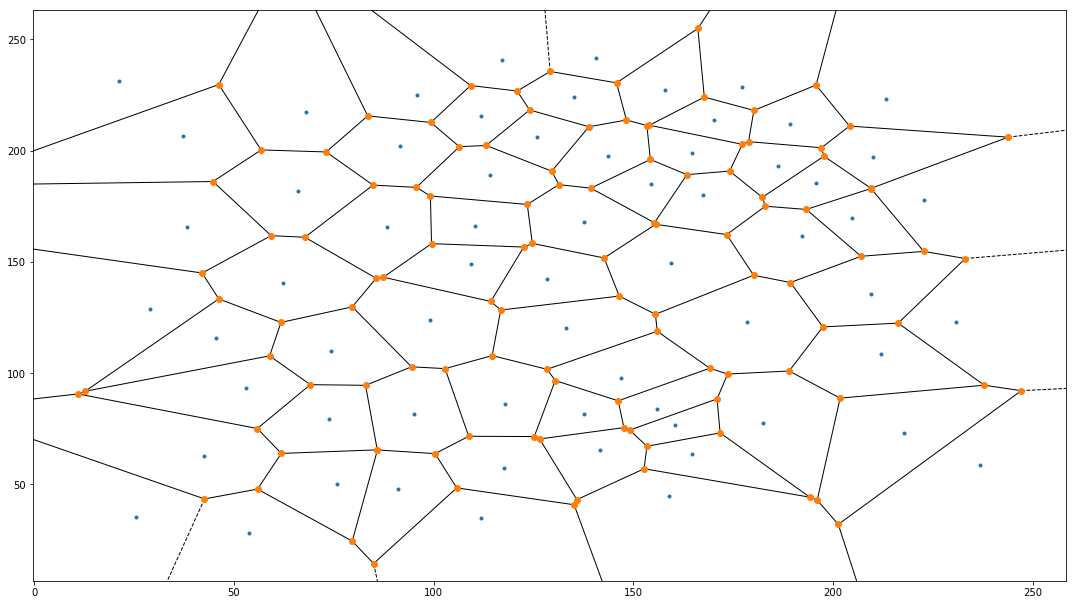

In [118]:
lloyd = relax_points(vor, 1)
fig = voronoi_plot_2d(lloyd)
fig.set_size_inches(18.5, 10.5)
plt.show()

In [177]:
import matplotlib
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

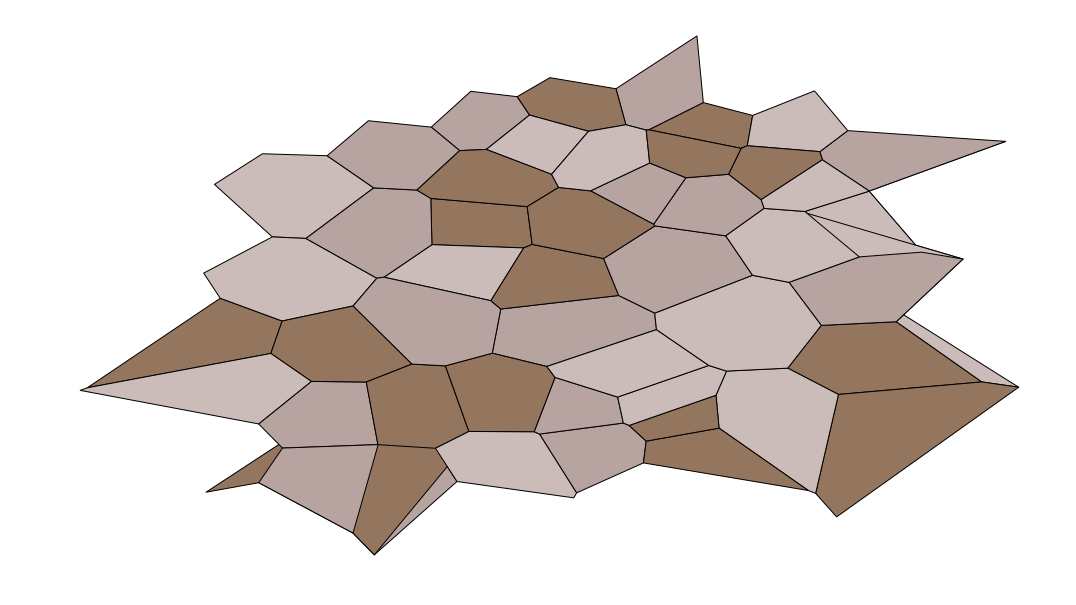

In [187]:
fig, ax = plt.subplots(1)

N = 3
nfloors = np.random.rand(N) # some random data

patches = []

cmap = plt.get_cmap('terrain')
colors = cmap(nfloors) # convert nfloors to colors that we can use later

patches = []
for region in lloyd.regions:
    if (region != []):
        vertices = lloyd.vertices[region]
        if (checkVertices(vertices)):
            polygon = Polygon(vertices, closed=True)
            patches.append(polygon)

collection = PatchCollection(patches, cmap=matplotlib.cm.jet)

ax.add_collection(collection)

collection.set_color(colors)
collection.set_edgecolor('k')
collection.set_clim([3, 50])

ax.autoscale_view()
fig.set_size_inches(18.5, 10.5)
#ax.set_facecolor('xkcd:sea blue')
plt.axis('off')
plt.show()
fig.savefig("map.png", dpi=fig.dpi, transparent=True)